Analysis code for the following blog post:

http://joshdatascience.blogspot.com/2017/12/are-there-any-particular-traits-we-can.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('moocs.csv')

In [3]:
data.head()

,MOOC,Headquarters,URL,Founded
0,ALISON,Ireland,https://alison.com/,2007
1,Canvas Network,USA,https://www.canvas.net/,2008
2,CNMOOC,China,http://www.cnmooc.org/home/index.mooc,2014
3,Coursera,USA,www.coursera.org,2012
4,Edraak (Arabic),Jordan,https://www.edraak.org/,2014


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
MOOC            46 non-null object
Headquarters    46 non-null object
URL             46 non-null object
Founded         46 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.5+ KB


### Number of MOOCs founded by year

In [5]:
counts_by_year_df = pd.DataFrame(data.groupby('Founded').count()['MOOC'])
counts_by_year_df.columns = ['Counts by Year']
counts_by_year_df

,Counts by Year
Founded,
2003,1
2005,2
2006,2
2007,3
2008,1
2009,1
2010,1
2012,7
2013,11


In [6]:
sns.set(style="whitegrid", color_codes=True)

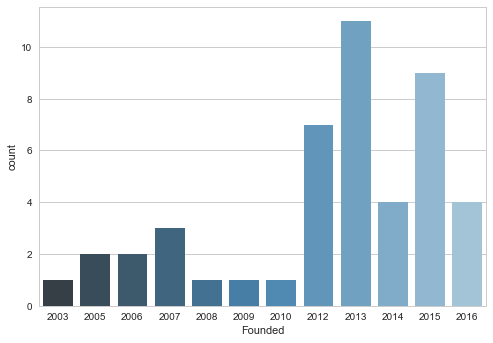

In [7]:
sns.set_color_codes("pastel")
sns.countplot(x='Founded',data=data, palette="Blues_d")

### Number MOOCs by Country

In [8]:
counts_by_country_df = pd.DataFrame(data.groupby('Headquarters').count()['MOOC'])
counts_by_country_df.columns = ['Counts by Country']
counts_by_country_df.sort_values(by='Counts by Country', inplace=True)
counts_by_country_df

,Counts by Country
Headquarters,
Western Pacific Region,1
UK,1
Thaiwan,1
Finland,1
Thailand,1
Germany,1
Taiwan,1
India/USA,1
Indonesia,1


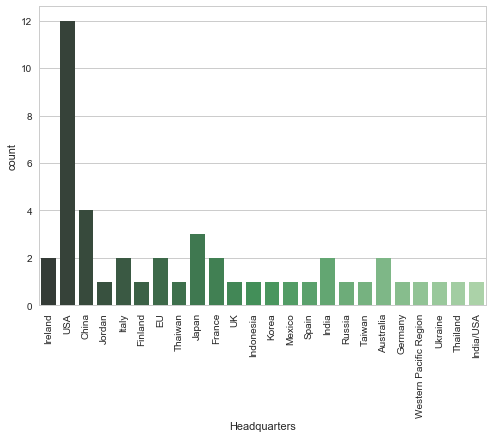

In [9]:
sns.set(style="whitegrid", color_codes=True)
sns.set_color_codes("pastel")
plot = sns.countplot(x='Headquarters',data=data, palette="Greens_d")

for label in plot.axes.get_xticklabels():
    label.set_rotation(90)

### Top 5 MOOCs with biggest number of users

(external data)

- Coursera – 23 million
- edX – 10 million
- XuetangX – 6 million
- FutureLearn – 5.3 million
- Udacity – 4 million

In [10]:
top5_with_most_users_df = data[data['MOOC']=='Coursera'].append(data[data['MOOC']=='edX']).append(data[data['MOOC']=='XuetangX']).\
append(data[data['MOOC']=='FutureLearn']).append(data[data['MOOC']=='Udacity']).reset_index().drop(['index'], axis=1)

top5_with_most_users_df

,MOOC,Headquarters,URL,Founded
0,Coursera,USA,www.coursera.org,2012
1,edX,USA,www.edx.org,2012
2,XuetangX,China,http://www.xuetangx.com/,2013
3,FutureLearn,UK,www.futurelearn.com,2012
4,Udacity,USA,https://www.udacity.com/,2012


Interestingly, 4 out of 5 MOOCs that are ranked as the top 5 MOOCs with biggest number of users were founded in 2012 (And the remaining one was established in 2013)